In [342]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [343]:
df=pd.read_csv("SP_with_Mean_nd_Dev.csv")
df=df.sort_values('Time')
df

,Unnamed: 0,Basin,No. of Cycl,Time,V5,V6,Lat,Lon,Speed(knots),lat_tenth,...,Week_1_Mean,Week_2_Mean,Week_3_Mean,Week_4_Mean,Week_1_SD,Week_2_SD,Week_3_SD,Week_4_SD,Avg_Wind_speed,Deviation_Wind_speed
4975,4975,SP,14,1982-01-25 18:00:00,BEST,0,180S,1541E,25,18.0,...,302.770524,302.834767,302.696789,302.532048,3.118572e-02,0.099161,0.320898,0.247650,NaN,NaN
5493,5493,SP,15,1982-01-25 18:00:00,BEST,0,169S,1732E,25,16.9,...,301.916875,301.769343,301.874618,301.472198,2.723977e-01,0.162159,0.223583,0.337109,NaN,NaN
5494,5494,SP,15,1982-01-26 00:00:00,BEST,0,171S,1732E,25,17.1,...,301.916875,301.769343,301.874618,301.472198,2.723977e-01,0.162159,0.223583,0.337109,NaN,NaN
4996,4996,SP,14,1982-01-26 00:00:00,BEST,0,191S,1548E,25,19.1,...,302.750988,302.849403,302.717611,302.461437,1.697182e-03,0.090447,0.340023,0.235320,NaN,NaN
5476,5476,SP,15,1982-01-26 06:00:00,BEST,0,173S,1733E,30,17.3,...,301.916875,301.769343,301.874618,301.472198,2.723977e-01,0.162159,0.223583,0.337109,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9131,9131,SP,27,2019-05-15 18:00:00,BEST,0,118S,1396E,25,11.8,...,302.877268,302.430571,302.860611,302.851731,0.000000e+00,0.202634,0.186216,0.117331,NaN,NaN
9132,9132,SP,27,2019-05-16 00:00:00,BEST,0,112S,1385E,25,11.2,...,302.877268,302.354019,302.846158,302.850016,0.000000e+00,0.229131,0.179313,0.103318,NaN,NaN
9133,9133,SP,27,2019-05-16 06:00:00,BEST,0,112S,1374E,20,11.2,...,302.948860,302.325174,302.849036,302.856936,5.684342e-14,0.283707,0.211501,0.123188,NaN,NaN
9263,9263,SP,27,2019-05-16 12:00:00,BEST,0,109S,1362E,20,10.9,...,302.942001,302.135018,302.790305,302.902561,0.000000e+00,0.352788,0.200390,0.100529,NaN,NaN


In [344]:
cols =[]
cols.append(list(df)[8])
cols.append(list(df)[44])
cols.append(list(df)[48])

In [345]:
df_for_training = df[cols].astype(float)

In [346]:
df_for_training 

,Speed(knots),Week_1_Mean,Week_1_SD
4975,25.0,302.770524,3.118572e-02
5493,25.0,301.916875,2.723977e-01
5494,25.0,301.916875,2.723977e-01
4996,25.0,302.750988,1.697182e-03
5476,30.0,301.916875,2.723977e-01
...,...,...,...
9131,25.0,302.877268,0.000000e+00
9132,25.0,302.877268,0.000000e+00
9133,20.0,302.948860,5.684342e-14
9263,20.0,302.942001,0.000000e+00


<AxesSubplot:>

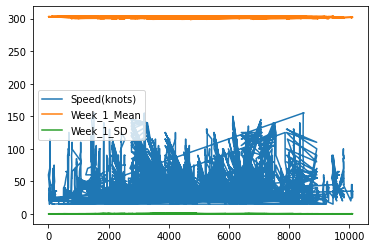

In [347]:
df_for_plot=df_for_training.tail(5000)
df_for_plot.plot.line()


In [348]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [349]:
df_for_training_scaled

array([[-0.83468119,  0.68519123, -0.78895789],
       [-0.83468119, -0.36613903,  1.3803383 ],
       [-0.83468119, -0.36613903,  1.3803383 ],
       ...,
       [-1.02575061,  0.9048249 , -1.06942098],
       [-1.02575061,  0.89637745, -1.06942098],
       [-0.83468119,  0.87948256, -1.06942098]])

In [350]:
X = []
Y = []

n_future = 1 
n_past = 14  #total past days
train_size=8000
test_size=len(df)-train_size-n_past

for i in range(n_past, len(df) - n_future +1):
    X.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    Y.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

X, Y = np.array(X), np.array(Y)

print('X shape == {}.'.format(X.shape))
print('Y shape == {}.'.format(Y.shape))

X shape == (10148, 14, 3).
Y shape == (10148, 1).


In [351]:
x_train=X[:train_size]
y_train=Y[:train_size]
x_test=X[train_size:]
y_test=Y[train_size:]
print(len(y_train))
print(len(y_test))


8000
2148


In [352]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))


model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 14, 64)            17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [353]:
history = model.fit(x_train, y_train, epochs=10, batch_size=1, validation_split=0.1, verbose=2)

Epoch 1/10
7200/7200 - 44s - loss: 0.3943 - accuracy: 0.0000e+00 - val_loss: 0.2420 - val_accuracy: 0.0000e+00 - 44s/epoch - 6ms/step
Epoch 2/10
7200/7200 - 39s - loss: 0.3111 - accuracy: 0.0000e+00 - val_loss: 0.1850 - val_accuracy: 0.0000e+00 - 39s/epoch - 5ms/step
Epoch 3/10
7200/7200 - 35s - loss: 0.2923 - accuracy: 0.0000e+00 - val_loss: 0.1720 - val_accuracy: 0.0000e+00 - 35s/epoch - 5ms/step
Epoch 4/10
7200/7200 - 35s - loss: 0.2690 - accuracy: 0.0000e+00 - val_loss: 0.1575 - val_accuracy: 0.0000e+00 - 35s/epoch - 5ms/step
Epoch 5/10
7200/7200 - 34s - loss: 0.2651 - accuracy: 0.0000e+00 - val_loss: 0.1577 - val_accuracy: 0.0000e+00 - 34s/epoch - 5ms/step
Epoch 6/10
7200/7200 - 35s - loss: 0.2537 - accuracy: 0.0000e+00 - val_loss: 0.1909 - val_accuracy: 0.0000e+00 - 35s/epoch - 5ms/step
Epoch 7/10
7200/7200 - 35s - loss: 0.2487 - accuracy: 0.0000e+00 - val_loss: 0.1546 - val_accuracy: 0.0000e+00 - 35s/epoch - 5ms/step
Epoch 8/10
7200/7200 - 40s - loss: 0.2449 - accuracy: 0.0000e+

In [354]:
train_dates=df['Time'][-test_size:].tolist()
print(len(train_dates))
#predict_period_dates = pd.date_range(list(train_dates)[-200], periods=n_future, freq='1d').tolist()
prediction = model.predict(x_test)

2148


In [355]:
train_dates

['2011-01-22 00:00:00',
 '2011-01-22 06:00:00',
 '2011-01-22 12:00:00',
 '2011-01-22 12:00:00',
 '2011-01-22 18:00:00',
 '2011-01-22 18:00:00',
 '2011-01-23 00:00:00',
 '2011-01-23 00:00:00',
 '2011-01-23 06:00:00',
 '2011-01-23 06:00:00',
 '2011-01-23 12:00:00',
 '2011-01-23 12:00:00',
 '2011-01-23 18:00:00',
 '2011-01-23 18:00:00',
 '2011-01-24 00:00:00',
 '2011-01-24 00:00:00',
 '2011-01-24 06:00:00',
 '2011-01-24 06:00:00',
 '2011-01-24 12:00:00',
 '2011-01-24 12:00:00',
 '2011-01-24 18:00:00',
 '2011-01-24 18:00:00',
 '2011-01-25 00:00:00',
 '2011-01-25 00:00:00',
 '2011-01-25 06:00:00',
 '2011-01-25 06:00:00',
 '2011-01-25 12:00:00',
 '2011-01-25 12:00:00',
 '2011-01-25 18:00:00',
 '2011-01-25 18:00:00',
 '2011-01-26 00:00:00',
 '2011-01-26 00:00:00',
 '2011-01-26 06:00:00',
 '2011-01-26 06:00:00',
 '2011-01-26 12:00:00',
 '2011-01-26 12:00:00',
 '2011-01-26 18:00:00',
 '2011-01-26 18:00:00',
 '2011-01-27 00:00:00',
 '2011-01-27 00:00:00',
 '2011-01-27 06:00:00',
 '2011-01-27 06:

In [356]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

copies = np.repeat(y_test, df_for_training.shape[1], axis=-1)
y_future = scaler.inverse_transform(copies)[:,0]

In [379]:
forecast_dates = []
original=df['Speed(knots)'][-test_size:]
for time_i in train_dates:
    forecast_dates.append(time_i)

    
print(len(original))
print(len(forecast_dates))
print(len(y_pred_future))
    
df_forecast = pd.DataFrame({'Time':(forecast_dates), 'Speed':y_pred_future,'Original_speed':original})


2148
2148
2148


In [380]:
df_forecast

,Time,Speed,Original_speed
2137,2011-01-22 00:00:00,31.559336,35
2136,2011-01-22 06:00:00,35.389725,40
2135,2011-01-22 12:00:00,40.312550,50
2661,2011-01-22 12:00:00,52.122162,25
2113,2011-01-22 18:00:00,42.478363,50
...,...,...,...
9131,2019-05-15 18:00:00,25.119997,25
9132,2019-05-16 00:00:00,25.591494,25
9133,2019-05-16 06:00:00,25.893881,20
9263,2019-05-16 12:00:00,22.555506,20


C:\Users\CHAITANYA AGRAWAL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CHAITANYA AGRAWAL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='Speed'>

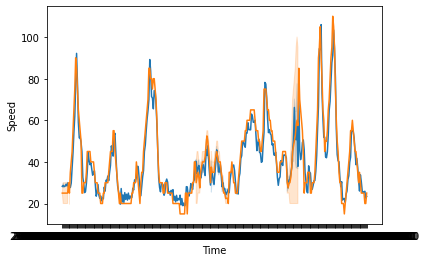

In [393]:
original = df_forecast[1750:]
original
#original = original.loc[original['Time'] >= '2019-1-1']
#original['Time']=pd.to_datetime(original['Time'])


sns.lineplot(original['Time'], original['Speed'])
sns.lineplot(original['Time'], original['Original_speed'])


In [394]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_actual=np.array(df_forecast['Original_speed'])
y_predicted=np.array(df_forecast['Speed'])
y_actual=y_actual.reshape(2148,1)
y_predicted=y_predicted.reshape(2148,1)


In [399]:
print(r2_score(y_actual,y_predicted))
print(mean_absolute_error(y_actual,y_predicted))

0.7830251387308583
8.148561031014781
